##Import Library


In [79]:
!pip install python-docx
import docx
import pandas as pd
import re
from pathlib import Path
import spacy
import os
!pip install python-docx
import pandas as pd
import docx

import re
from pathlib import Path
import spacy
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import re
from pathlib import Path
import spacy
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import re
from pathlib import Path
import spacy
import os
!pip install python-docx
import pandas as pd
import docx

import re
from pathlib import Path
import spacy
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import re
from pathlib import Path
import spacy
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [80]:
nlp = spacy.load("en_core_web_sm")

It is an NLP library

It is used to process and analyze English text in your Python projects.

In [81]:
class ResumeAnalyzer:
    def __init__(self):

        self.sections = [
            'education', 'experience', 'skills', 'projects',
            'achievements', 'certifications', 'contact'
        ]

        self.skill_categories = {
            'programming': ['python', 'java', 'javascript', 'c++', 'ruby', 'sql'],
            'data_science': ['machine learning', 'data analysis', 'statistics', 'tensorflow', 'pytorch'],
            'web_development': [
                'html', 'css', 'react', 'angular', 'vue.js', 'node.js', 'django',
                'flask', 'php', 'wordpress', 'bootstrap', 'jquery'],
            'soft_skills': ['leadership', 'communication', 'teamwork', 'problem solving'],
            'tools': ['git', 'docker', 'kubernetes', 'aws', 'azure']
        }


1.defining common sections in all resumes

2.defining keywords for skill categorization

In [82]:
    def extract_text_from_doc(self, file_path):
        try:
            doc = docx.Document(file_path)
            full_text = []
            for para in doc.paragraphs:
                full_text.append(para.text)
            return '\n'.join(full_text)
        except Exception as e:
            print(f"Error reading file {file_path}: {str(e)}")
            return ""

1.Extracting text from the documents

In [83]:
    def extract_contact_info(self, text):
        # Email extraction
        email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
        email = re.findall(email_pattern, text)

        # Phone number extraction
        phone_pattern = r'\b(?:\+\d{1,3}[-.]?)?\(?\d{3}\)?[-.]?\d{3}[-.]?\d{4}\b'
        phone = re.findall(phone_pattern, text)

        # Use spaCy for name extraction
        doc = nlp(text[:1000])  # Process first 1000 chars for efficiency
        name = ' '.join([ent.text for ent in doc.ents if ent.label_ == 'PERSON'][:1])

        return {
            'name': name,
            'email': email[0] if email else '',
            'phone': phone[0] if phone else ''
        }

1.Extracting email,phone and name using regex and spaCy NER.

In [84]:
    def extract_skills(self, text):
        """Extract and categorize skills from text."""
        skills = {}
        for category, keywords in self.skill_categories.items():
            found_skills = []
            for skill in keywords:
                if re.search(r'\b' + re.escape(skill) + r'\b', text.lower()):
                    found_skills.append(skill)
            skills[category] = found_skills
        return skills

Extracting and categirizing skills from text.

In [85]:
    def extract_education(self, text):
        education_keywords = ['bachelor', 'master', 'phd', 'degree']
        doc = nlp(text)
        education = []

        for sent in doc.sents:
            if any(keyword in sent.text.lower() for keyword in education_keywords):
                education.append(sent.text.strip())

        return education

1.Extracting education information

In [86]:
    def parse_resume(self, file_path):
        text = self.extract_text_from_doc(file_path)
        if not text:  # Skip if no text was extracted
            return None

        contact_info = self.extract_contact_info(text)
        skills = self.extract_skills(text)
        education = self.extract_education(text)

        return {
            **contact_info,
            'skills': skills,
            'education': education,
            'file_name': Path(file_path).name,
            'full_text': text
        }

Main function to  extract data from single resume.

In [87]:
    def process_resumes(self, folder_path):
        resume_data = []
        folder = Path(folder_path)

        # Process all .docx files in the folder
        for file_path in folder.glob('*.docx'):
            try:
                parsed_data = self.parse_resume(str(file_path))
                if parsed_data:  # Only add if parsing was successful
                    resume_data.append(parsed_data)
                    print(f"Successfully processed: {file_path.name}")
            except Exception as e:
                print(f"Error processing {file_path.name}: {str(e)}")
        df = pd.DataFrame(resume_data)
        output_path = folder / 'parsed_resumes.csv'
        df.to_csv(output_path, index=False)
        print(f"\nProcessed {len(resume_data)} resumes. Results saved to {output_path}")

        return df

Processing all the resumes in a folder.

In [88]:
import pandas as pd
from pathlib import Path


class ResumeAnalyzer:
    def __init__(self):
        pass

    def extract_text_from_doc(self, file_path):
        return "Sample extracted text"

import pandas as pd
from pathlib import Path


class ResumeAnalyzer:
    def __init__(self):
        pass

    def extract_text_from_doc(self, file_path):
        return "Sample extracted text"

    def extract_contact_info(self, text):
        return {}

#Import Dataset

In [89]:
import pandas as pd
try:
    df = pd.read_csv('resumes_dataset.csv')
    print("File loaded successfully from the current directory.")
except FileNotFoundError:
    try:
        df = pd.read_csv('/content/resumes_dataset.csv')
        print("File loaded successfully from '/content/'.")
    except FileNotFoundError:
        from google.colab import files
        uploaded = files.upload()
        file_name = list(uploaded.keys())[0]
        df = pd.read_csv(file_name)
        print(f"File '{file_name}' uploaded and loaded successfully.")

File loaded successfully from the current directory.


In [90]:
df

,name,email,phone,skills,education,experience,file_name
0,Anil kumar.docx,NaN,NaN,"{'programming': ['sql'], 'data_science': [], '...",[],"{'total_years': 0, 'current_role': None, 'expe...",Anil kumar.docx
1,AradhanaTripathi[4_0].docx,NaN,NaN,"{'programming': ['python', 'sql'], 'data_scien...",[],"{'total_years': 2, 'current_role': None, 'expe...",AradhanaTripathi[4_0].docx
2,Buddha Vamsi.docx,NaN,NaN,"{'programming': ['sql'], 'data_science': [], '...",[],"{'total_years': 0, 'current_role': None, 'expe...",Buddha Vamsi.docx
3,ChinnaSubbarayuduM_Hexaware.docx,NaN,NaN,"{'programming': ['sql'], 'data_science': [], '...",[],"{'total_years': 1, 'current_role': None, 'expe...",ChinnaSubbarayuduM_Hexaware.docx
4,Gopi Krishna_Hexaware.docx,NaN,NaN,"{'programming': [], 'data_science': [], 'web_d...",['EDUCATIONAL DETAILS:\n\nCompleted Bachelor o...,"{'total_years': 0, 'current_role': None, 'expe...",Gopi Krishna_Hexaware.docx
...,...,...,...,...,...,...,...
75,Tatikonda Kiran Kumar.doc,NaN,NaN,"{'programming': ['sql'], 'data_science': [], '...",['Bachelor of computer application in SV Unive...,"{'total_years': 0, 'current_role': None, 'expe...",Tatikonda Kiran Kumar.doc
76,Venkateswarlu B_Hexaware.doc,NaN,NaN,"{'programming': [], 'data_science': [], 'web_d...",['Completed Bachelor of Technology (B. Tech) i...,"{'total_years': 0, 'current_role': None, 'expe...",Venkateswarlu B_Hexaware.doc
77,Vinay Kumar_Hexaware.docx,NaN,NaN,"{'programming': [], 'data_science': [], 'web_d...",['EDUCATION SUMMARY\t\nMaster of business admi...,"{'total_years': 0, 'current_role': None, 'expe...",Vinay Kumar_Hexaware.docx
78,Vinod B.docx,NaN,NaN,"{'programming': ['sql'], 'data_science': [], '...",[],"{'total_years': 0, 'current_role': None, 'expe...",Vinod B.docx


In [91]:
df[df.duplicated()]

,name,email,phone,skills,education,experience,file_name


In [92]:
df[df.isnull().any(axis=1)].head()

,name,email,phone,skills,education,experience,file_name
0,Anil kumar.docx,NaN,NaN,"{'programming': ['sql'], 'data_science': [], '...",[],"{'total_years': 0, 'current_role': None, 'expe...",Anil kumar.docx
1,AradhanaTripathi[4_0].docx,NaN,NaN,"{'programming': ['python', 'sql'], 'data_scien...",[],"{'total_years': 2, 'current_role': None, 'expe...",AradhanaTripathi[4_0].docx
2,Buddha Vamsi.docx,NaN,NaN,"{'programming': ['sql'], 'data_science': [], '...",[],"{'total_years': 0, 'current_role': None, 'expe...",Buddha Vamsi.docx
3,ChinnaSubbarayuduM_Hexaware.docx,NaN,NaN,"{'programming': ['sql'], 'data_science': [], '...",[],"{'total_years': 1, 'current_role': None, 'expe...",ChinnaSubbarayuduM_Hexaware.docx
4,Gopi Krishna_Hexaware.docx,NaN,NaN,"{'programming': [], 'data_science': [], 'web_d...",['EDUCATIONAL DETAILS:\n\nCompleted Bachelor o...,"{'total_years': 0, 'current_role': None, 'expe...",Gopi Krishna_Hexaware.docx


#Data Cleaning

Clean names section

In [101]:
import pandas as pd
import ast
import re

file_path = 'resumes_dataset.csv'
df = pd.read_csv(file_path)
def clean_name(name):
    return re.sub(r"(\.docx|\.pdf|\[.*?\])", "", str(name)).strip()

df['name'] = df['name'].apply(clean_name)

Clean skills section

In [102]:

def extract_skills(skill_data):
    try:
        skill_dict = ast.literal_eval(skill_data)
        if isinstance(skill_dict, dict):
            all_skills = []
            for key, values in skill_dict.items():
                all_skills.extend(values)
            return ', '.join(set(all_skills))
    except (ValueError, SyntaxError):
        pass
    return None

df['skills'] = df['skills'].apply(extract_skills)

Extract experience  in numerically

In [103]:

def extract_experience_years(exp_data):
    try:
        exp_dict = ast.literal_eval(exp_data)
        if isinstance(exp_dict, dict) and 'total_years' in exp_dict:
            return exp_dict.get('total_years', 0)
    except (ValueError, SyntaxError):
        pass
    return 0

df['experience'] = df['experience'].apply(extract_experience_years)

Education section cleaning part

In [104]:

def infer_education(row):
    edu_data = row['education']
    skills = row['skills']
    experience = row['experience']
    if isinstance(edu_data, str) and edu_data.strip() != "[]":
        degrees = re.findall(r"(Bachelor|Master|B\.Tech|M\.Tech|Ph\.D|BSc|MSc|MBA|Diploma)", edu_data, re.IGNORECASE)
        if degrees:
            return ', '.join(set(degrees))
    if isinstance(skills, str):
        if "AWS" in skills or "Microsoft" in skills or "Certified" in skills:
            return "Diploma or Certification"
        if "python" in skills or "data science" in skills or "sql" in skills:
            return "Bachelor's Degree"

    if experience >= 5:
        return "Bachelor's Degree"
    elif 1 <= experience < 5:
        return "Diploma or Associate Degree"

    return "High School or Equivalent"

df['education'] = df.apply(infer_education, axis=1)

Final clean dataframe

In [105]:
df_cleaned = df[['name', 'skills', 'education', 'experience', 'file_name']]

Display & save the cleaned data

In [106]:
print(df_cleaned.head())
output_path = 'cleaned_resumes_dataset.csv'
df_cleaned.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")

                          name                           skills  \
0                   Anil kumar                              sql   
1             AradhanaTripathi  data analysis, sql, python, aws   
2                 Buddha Vamsi                              sql   
3  ChinnaSubbarayuduM_Hexaware                              sql   
4        Gopi Krishna_Hexaware                    communication   

           education  experience                         file_name  
0  Bachelor's Degree           0                   Anil kumar.docx  
1  Bachelor's Degree           2        AradhanaTripathi[4_0].docx  
2  Bachelor's Degree           0                 Buddha Vamsi.docx  
3  Bachelor's Degree           1  ChinnaSubbarayuduM_Hexaware.docx  
4           Bachelor           0        Gopi Krishna_Hexaware.docx  
Cleaned dataset saved to cleaned_resumes_dataset.csv


In [107]:
df = df.drop(columns=['email'])

In [108]:
df = df.drop(columns=['phone'])

In [109]:
import pandas as pd
file_path = 'cleaned_resumes_dataset.csv'
df = pd.read_csv(file_path)
print(df)

                                     name  \
0                              Anil kumar   
1                        AradhanaTripathi   
2                            Buddha Vamsi   
3             ChinnaSubbarayuduM_Hexaware   
4                   Gopi Krishna_Hexaware   
..                                    ...   
75              Tatikonda Kiran Kumar.doc   
76           Venkateswarlu B_Hexaware.doc   
77                   Vinay Kumar_Hexaware   
78                                Vinod B   
79  Reactjs Developer_Prabakaran_Musquare   

                                          skills          education  \
0                                            sql  Bachelor's Degree   
1                data analysis, sql, python, aws  Bachelor's Degree   
2                                            sql  Bachelor's Degree   
3                                            sql  Bachelor's Degree   
4                                  communication           Bachelor   
..                               

In [110]:
df

,name,skills,education,experience,file_name
0,Anil kumar,sql,Bachelor's Degree,0,Anil kumar.docx
1,AradhanaTripathi,"data analysis, sql, python, aws",Bachelor's Degree,2,AradhanaTripathi[4_0].docx
2,Buddha Vamsi,sql,Bachelor's Degree,0,Buddha Vamsi.docx
3,ChinnaSubbarayuduM_Hexaware,sql,Bachelor's Degree,1,ChinnaSubbarayuduM_Hexaware.docx
4,Gopi Krishna_Hexaware,communication,Bachelor,0,Gopi Krishna_Hexaware.docx
...,...,...,...,...,...
75,Tatikonda Kiran Kumar.doc,sql,Bachelor,0,Tatikonda Kiran Kumar.doc
76,Venkateswarlu B_Hexaware.doc,communication,Bachelor,0,Venkateswarlu B_Hexaware.doc
77,Vinay Kumar_Hexaware,"communication, leadership",Master,0,Vinay Kumar_Hexaware.docx
78,Vinod B,sql,Bachelor's Degree,0,Vinod B.docx


##EDA

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
file_path = 'cleaned_resumes_dataset.csv'
df = pd.read_csv(file_path)


 Distribution of education levels

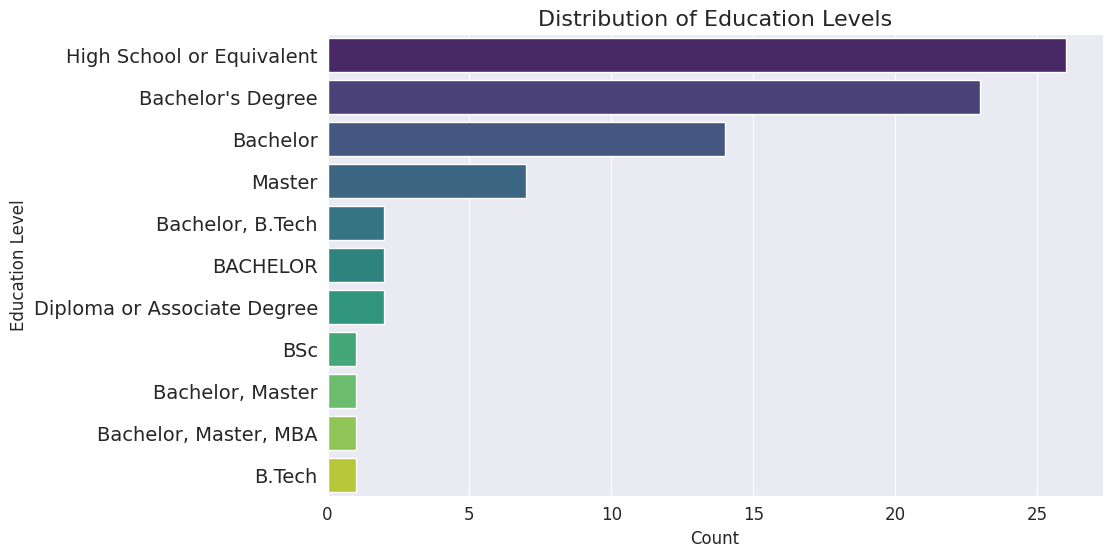

In [112]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['education'], order=df['education'].value_counts().index, palette="viridis")
plt.title('Distribution of Education Levels', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.show()


Distribution of experience years

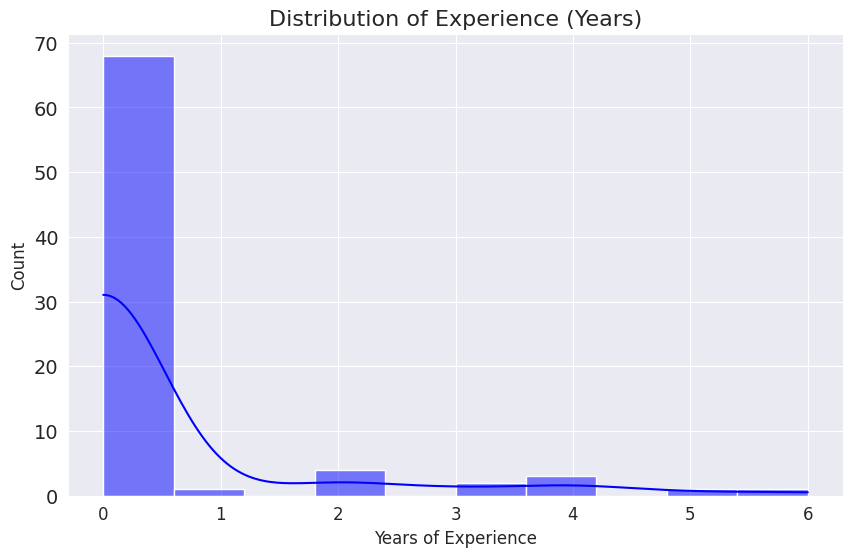

In [113]:
plt.figure(figsize=(10, 6))
sns.histplot(df['experience'], bins=10, kde=True, color='blue')
plt.title('Distribution of Experience (Years)', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


Education and calculate mean experience

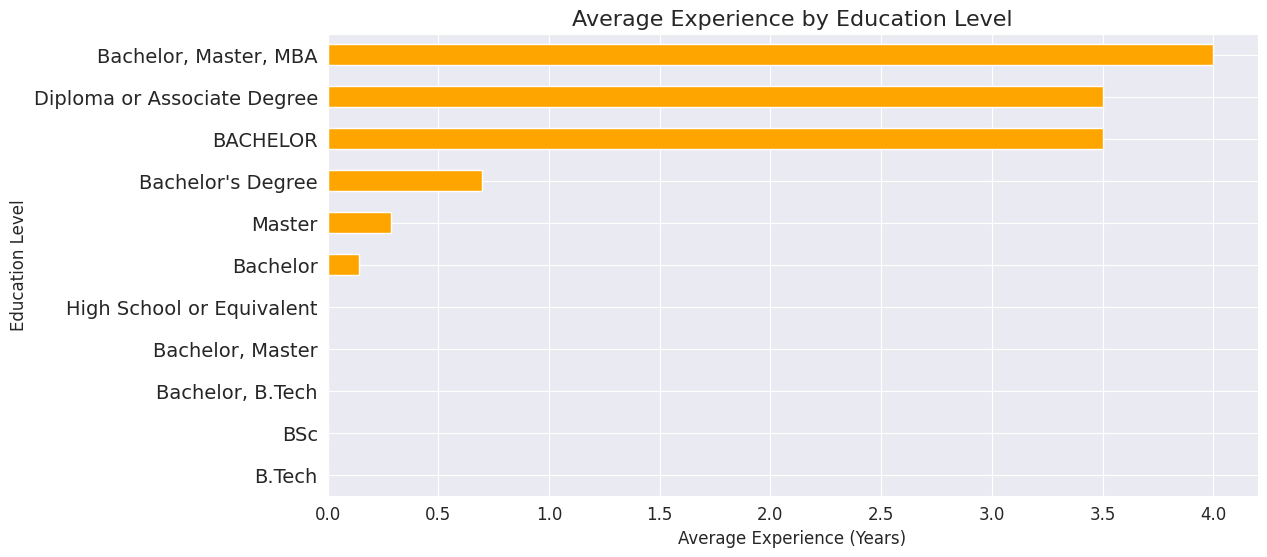

In [114]:
edu_exp = df.groupby('education')['experience'].mean().sort_values()
plt.figure(figsize=(12, 6))
edu_exp.plot(kind='barh', color='orange')
plt.title('Average Experience by Education Level', fontsize=16)
plt.xlabel('Average Experience (Years)', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.show()


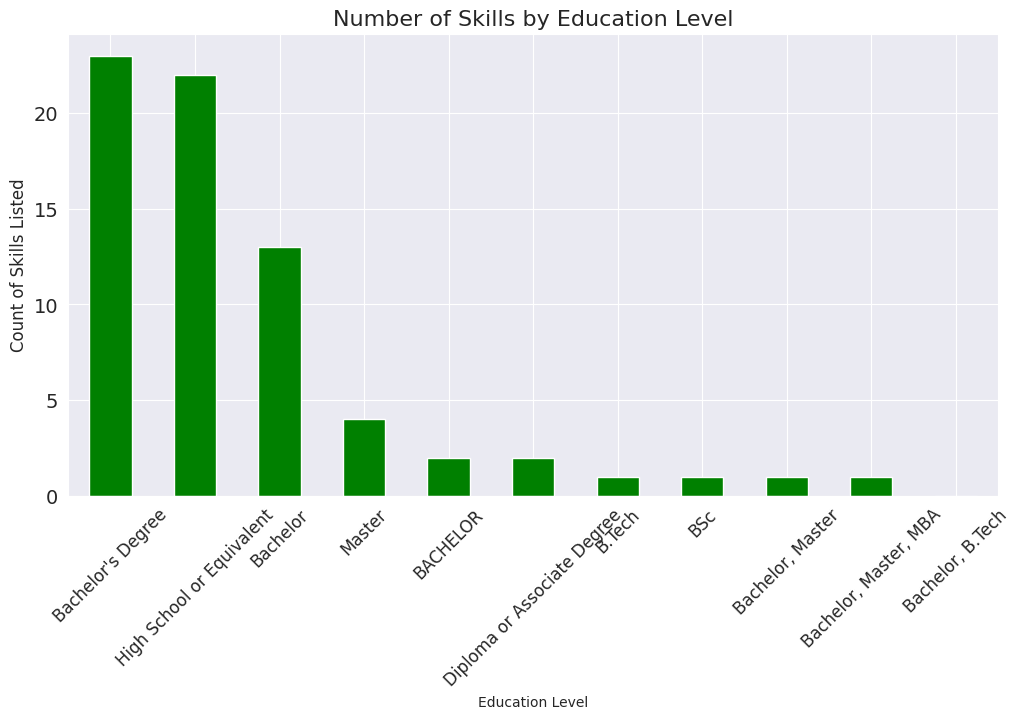

In [115]:
skills_edu = df.groupby('education')['skills'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
skills_edu.plot(kind='bar', color='green')
plt.title('Number of Skills by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=10)
plt.ylabel('Count of Skills Listed', fontsize=12)
plt.xticks(rotation=45)
plt.show()


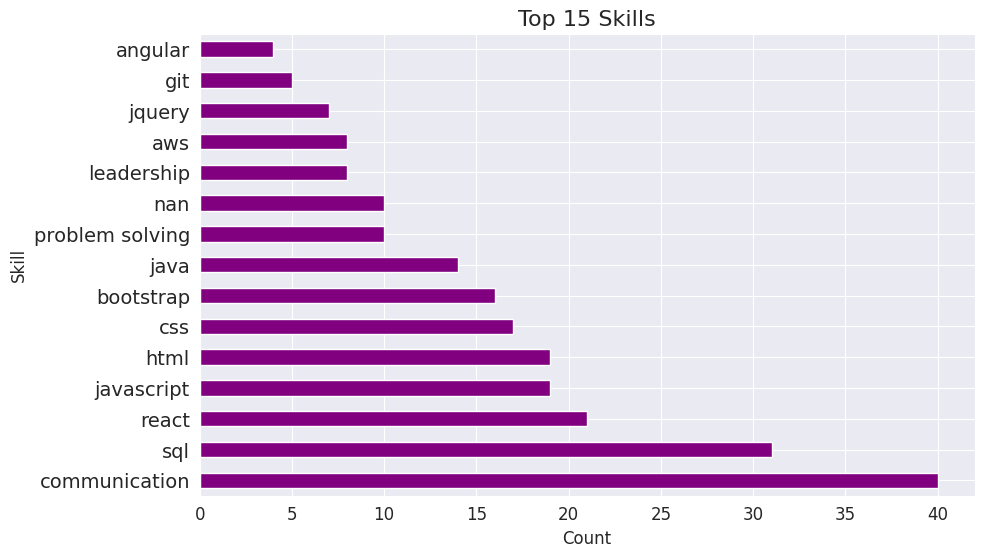

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_skills = ', '.join(df['skills'].astype(str).tolist())
skills_series = pd.Series(all_skills.split(', '))
top_skills = skills_series.value_counts().head(15)

plt.figure(figsize=(10, 6))
top_skills.plot(kind='barh', color='purple')
plt.title('Top 15 Skills', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Skill', fontsize=12)
plt.show()

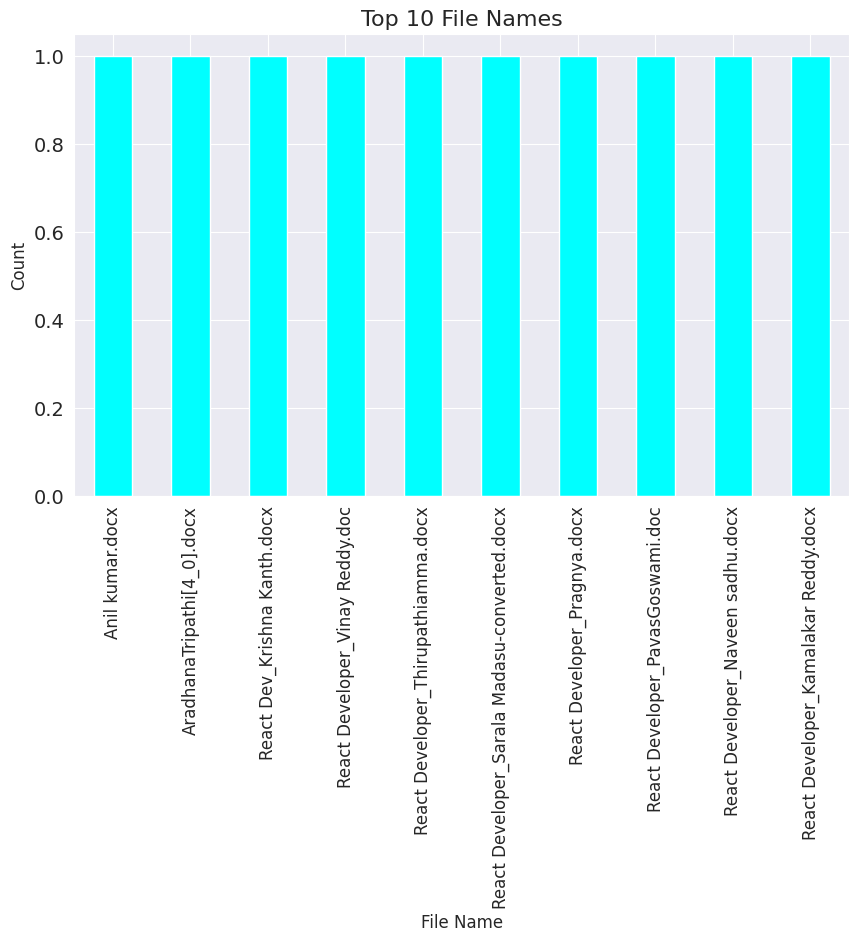

In [117]:
file_usage = df['file_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
file_usage.plot(kind='bar', color='cyan')
plt.title('Top 10 File Names', fontsize=16)
plt.xlabel('File Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


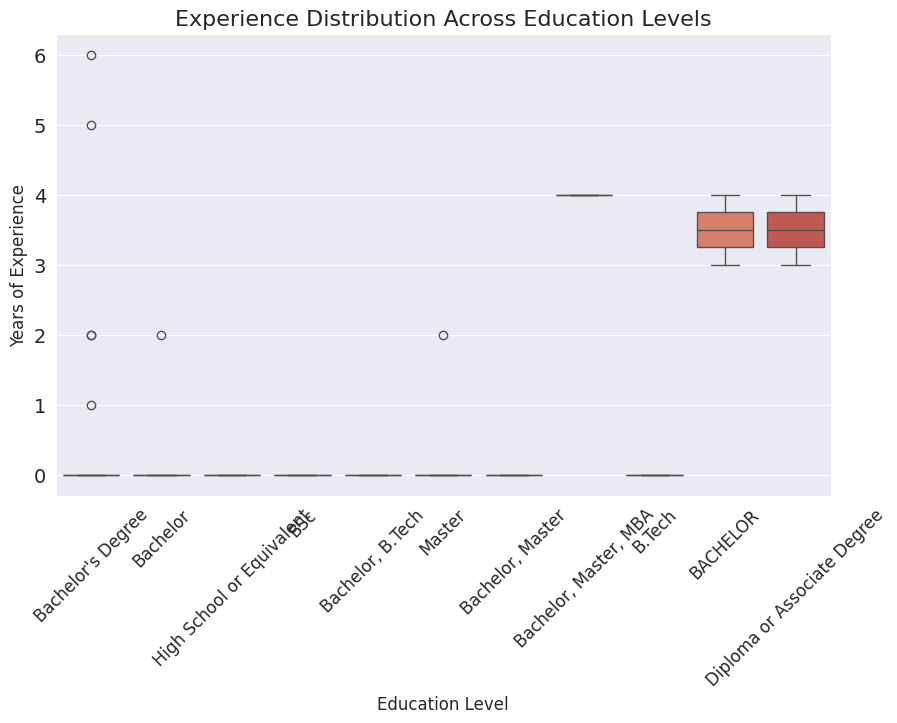

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='experience', data=df, palette='coolwarm')
plt.title('Experience Distribution Across Education Levels', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Years of Experience', fontsize=12)
plt.xticks(rotation=45)
plt.show()


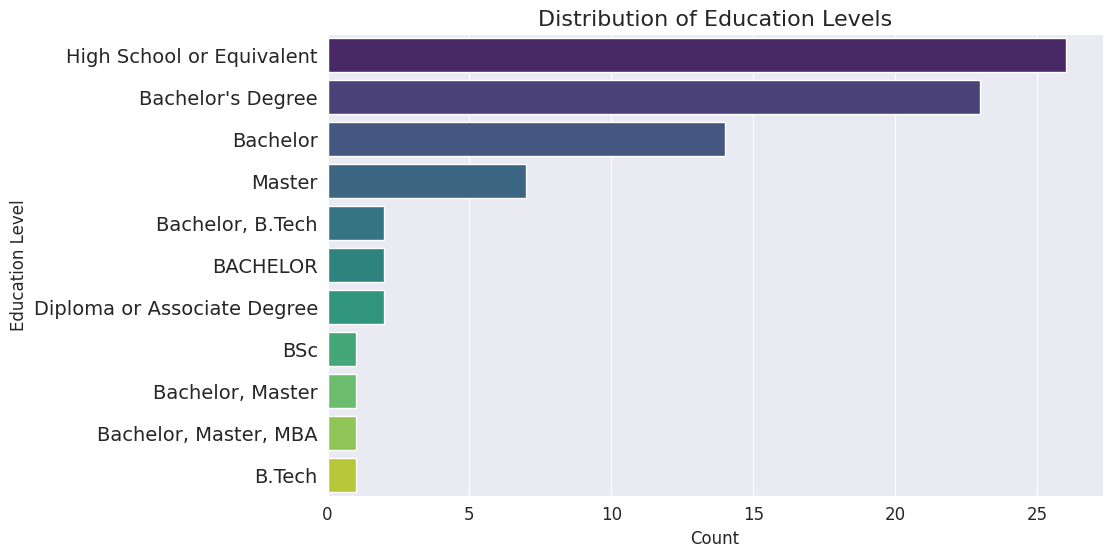

In [119]:

plt.figure(figsize=(10, 6))
sns.countplot(y=df['education'], order=df['education'].value_counts().index, palette="viridis")
plt.title('Distribution of Education Levels', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.savefig('images')
plt.show()


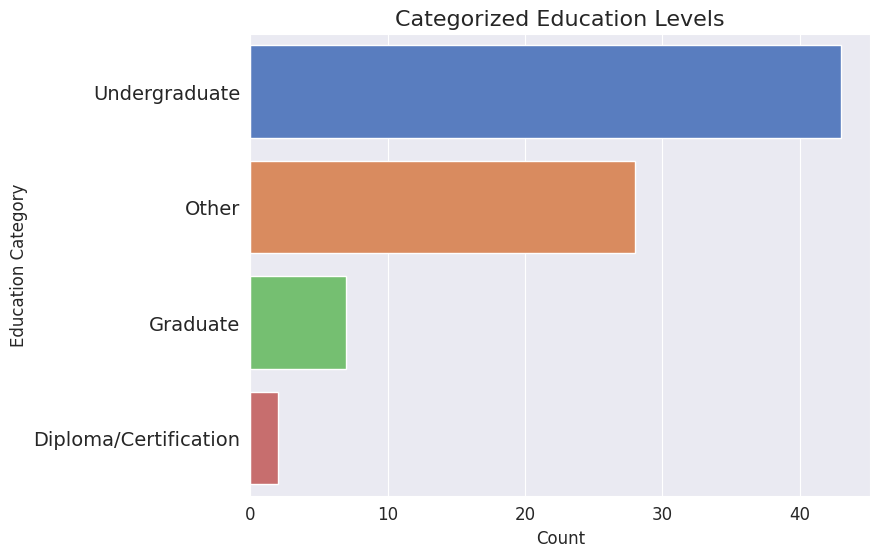

In [120]:
# Define a function to categorize education levels
def categorize_education(education):
    if "Bachelor" in education or "B.Tech" in education or "BSc" in education:
        return "Undergraduate"
    elif "Master" in education or "MBA" in education or "M.Tech" in education or "MSc" in education:
        return "Graduate"
    elif "Diploma" in education or "Certification" in education:
        return "Diploma/Certification"
    elif "Ph.D" in education:
        return "Doctorate"
    else:
        return "Other"

df['education_category'] = df['education'].apply(categorize_education)

# Visualize the categories
plt.figure(figsize=(8, 6))
sns.countplot(y=df['education_category'], order=df['education_category'].value_counts().index, palette="muted")
plt.title('Categorized Education Levels', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Category', fontsize=12)
plt.show()


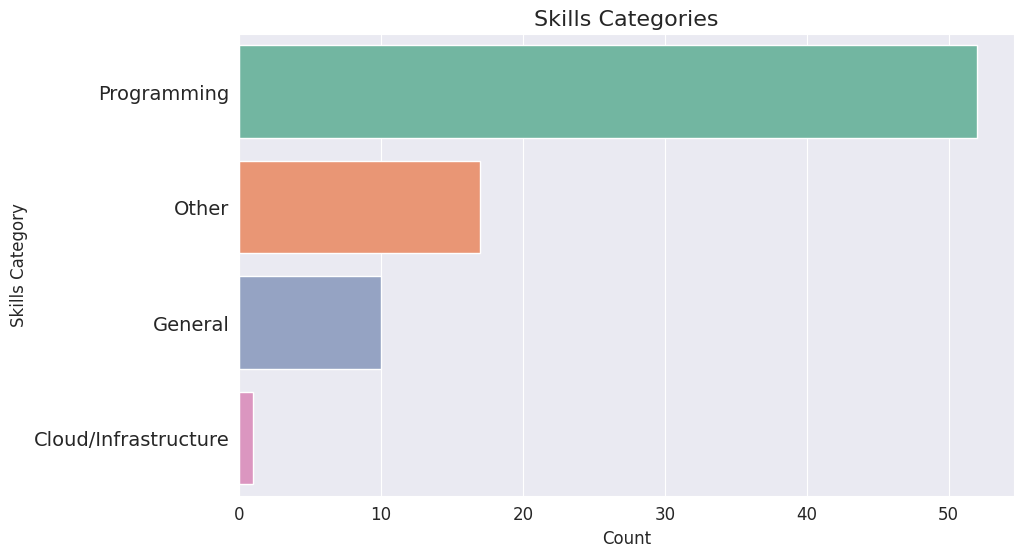

In [121]:

def categorize_skills(skills):
    if not isinstance(skills, str):
        return "General"
    if any(word in skills.lower() for word in ['python', 'java', 'sql', 'c++', 'javascript']):
        return "Programming"
    elif any(word in skills.lower() for word in ['aws', 'azure', 'cloud']):
        return "Cloud/Infrastructure"
    elif any(word in skills.lower() for word in ['data science', 'machine learning', 'ai']):
        return "Data/AI"
    elif any(word in skills.lower() for word in ['marketing', 'seo', 'sales']):
        return "Marketing"
    else:
        return "Other"

df['skills_category'] = df['skills'].apply(categorize_skills)

plt.figure(figsize=(10, 6))
sns.countplot(y=df['skills_category'], order=df['skills_category'].value_counts().index, palette="Set2")
plt.title('Skills Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Skills Category', fontsize=12)
plt.show()


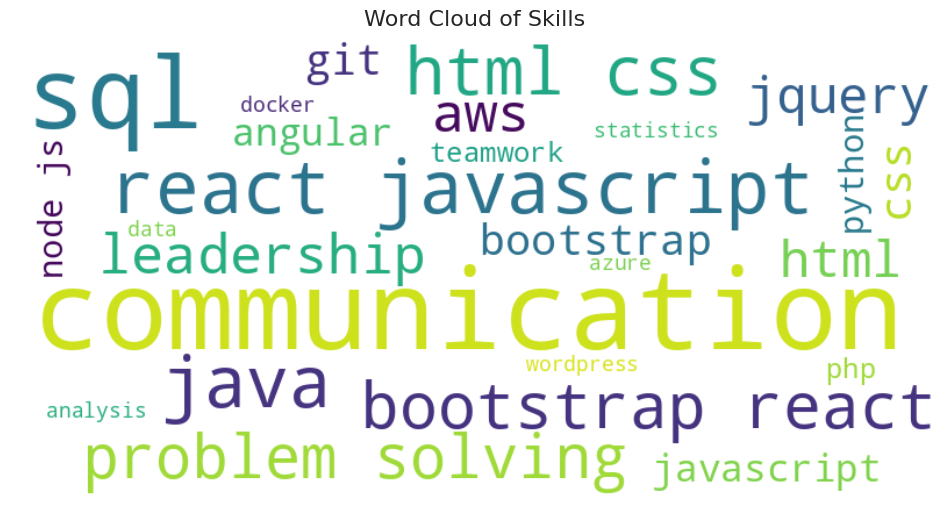

In [122]:
# Combine all skills into one string
all_skills = ' '.join(df['skills'].dropna().tolist())

# Generate a word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_skills)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Skills', fontsize=16)
plt.show()


#EDA END

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

In [124]:
resume_data = pd.read_csv('Cleaned_Resumes (1).csv')
resume_data.head()

,Category,Resume_Details
0,Category 1,anubhav kumar singh core competencies scriptin...
1,Category 1,ananda rayudu profile summary years experience...
2,Category 1,peoplesoft database administrator gangareddy p...
3,Category 1,classification internal classification interna...
4,Category 1,priyanka ramadoss mountpleasant coonoor nilgir...


In [125]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,Resume_Details,LebelEncoding
0,Category 1,anubhav kumar singh core competencies scriptin...,0
1,Category 1,ananda rayudu profile summary years experience...,0
2,Category 1,peoplesoft database administrator gangareddy p...,0
3,Category 1,classification internal classification interna...,0
4,Category 1,priyanka ramadoss mountpleasant coonoor nilgir...,0
...,...,...,...
74,Category 4,workday integration consultant name sri krishn...,3
75,Category 4,srikanth workday hcm consultant seeking suitab...,3
76,Category 4,workday hcm fcm name kumar role workday consul...,3
77,Category 4,venkateswarlu workday consultant professional ...,3


In [126]:
resume_data.describe()

,LebelEncoding
count,79.000000
mean,1.455696
std,1.141271
min,0.000000
25%,0.500000
50%,1.000000
75%,3.000000
max,3.000000


In [127]:
resume_data.isnull().sum()

,0
Category,0
Resume_Details,0
LebelEncoding,0


##Model Building

Train - Test Split

In [128]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((59,), (20,))

TF-IDF Vectorization

In [130]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [131]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [132]:
x_train.shape, x_test.shape

((59, 3756), (20, 3756))

In [133]:
print(y_train),print(y_test)

['Category 1' 'Category 2' 'Category 1' 'Category 4' 'Category 3'
 'Category 3' 'Category 2' 'Category 1' 'Category 2' 'Category 1'
 'Category 2' 'Category 3' 'Category 2' 'Category 2' 'Category 4'
 'Category 2' 'Category 3' 'Category 2' 'Category 1' 'Category 2'
 'Category 2' 'Category 4' 'Category 1' 'Category 1' 'Category 1'
 'Category 3' 'Category 4' 'Category 4' 'Category 4' 'Category 2'
 'Category 4' 'Category 2' 'Category 3' 'Category 4' 'Category 2'
 'Category 4' 'Category 3' 'Category 4' 'Category 1' 'Category 1'
 'Category 3' 'Category 1' 'Category 4' 'Category 3' 'Category 1'
 'Category 4' 'Category 1' 'Category 3' 'Category 4' 'Category 4'
 'Category 4' 'Category 1' 'Category 2' 'Category 2' 'Category 2'
 'Category 1' 'Category 2' 'Category 2' 'Category 4']
['Category 1' 'Category 1' 'Category 2' 'Category 4' 'Category 4'
 'Category 2' 'Category 2' 'Category 2' 'Category 1' 'Category 2'
 'Category 3' 'Category 3' 'Category 3' 'Category 3' 'Category 4'
 'Category 4' 'Categor

(None, None)

Classification Models

 KNN Classifier

In [134]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.64
Accuracy of  test set    : 0.65
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
              precision    recall  f1-score   support

  Category 1       0.50      0.40      0.44         5
  Category 2       1.00      1.00      1.00         6
  Category 3       0.00      0.00      0.00         4
  Category 4       0.50      1.00      0.67         5

    accuracy                           0.65        20
   macro avg       0.50      0.60      0.53        20
weighted avg       0.55      0.65      0.58        20




 Decision Tree Classifier

In [135]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

  Category 1       1.00      1.00      1.00         5
  Category 2       1.00      1.00      1.00         6
  Category 3       1.00      1.00      1.00         4
  Category 4       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20




Random Forest Classifier

In [136]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier RandomForestClassifier(n_estimators=200):
              precision    recall  f1-score   support

  Category 1       1.00      0.80      0.89         5
  Category 2       0.86      1.00      0.92         6
  Category 3       1.00      1.00      1.00         4
  Category 4       1.00      1.00      1.00         5

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20




Support Vectore Machine (SVM) Classifier

In [137]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier SVC():
              precision    recall  f1-score   support

  Category 1       1.00      0.80      0.89         5
  Category 2       0.86      1.00      0.92         6
  Category 3       1.00      1.00      1.00         4
  Category 4       1.00      1.00      1.00         5

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20




Logistic Regression

In [138]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

  Category 1       1.00      0.80      0.89         5
  Category 2       0.86      1.00      0.92         6
  Category 3       1.00      1.00      1.00         4
  Category 4       1.00      1.00      1.00         5

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20




Bagging Classifier

In [139]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
              precision    recall  f1-score   support

  Category 1       1.00      1.00      1.00         5
  Category 2       1.00      1.00      1.00         6
  Category 3       1.00      1.00      1.00         4
  Category 4       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20




AdaBoost Classifier

In [140]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.75
Accuracy of  test set    : 0.75
Classification report for classifier AdaBoostClassifier(n_estimators=100):
              precision    recall  f1-score   support

  Category 1       0.00      0.00      0.00         5
  Category 2       0.55      1.00      0.71         6
  Category 3       1.00      1.00      1.00         4
  Category 4       1.00      1.00      1.00         5

    accuracy                           0.75        20
   macro avg       0.64      0.75      0.68        20
weighted avg       0.61      0.75      0.66        20




 Gradient Boosting Classifier

In [141]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
              precision    recall  f1-score   support

  Category 1       1.00      1.00      1.00         5
  Category 2       1.00      1.00      1.00         6
  Category 3       1.00      1.00      1.00         4
  Category 4       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20




Naive Bayes Classifier

In [142]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

  Category 1       1.00      1.00      1.00         5
  Category 2       1.00      1.00      1.00         6
  Category 3       1.00      1.00      1.00         4
  Category 4       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20




Model Evaluation

In [143]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.644068,0.65,0.50,0.60,0.53
1,DecisionTree Classifier,1.000000,1.00,1.00,1.00,1.00
2,RandomForest Classifier,1.000000,0.95,0.96,0.95,0.95
3,SVM Classifier,1.000000,0.95,0.96,0.95,0.95
4,Logistic Regression,1.000000,0.95,0.96,0.95,0.95
5,Bagging Classifier,1.000000,1.00,1.00,1.00,1.00
6,AdaBoost Classifier,0.745763,0.75,0.64,0.75,0.68
7,Gradient Boosting Classifier,1.000000,1.00,1.00,1.00,1.00
8,Naive Bayes Classifier,1.000000,1.00,1.00,1.00,1.00


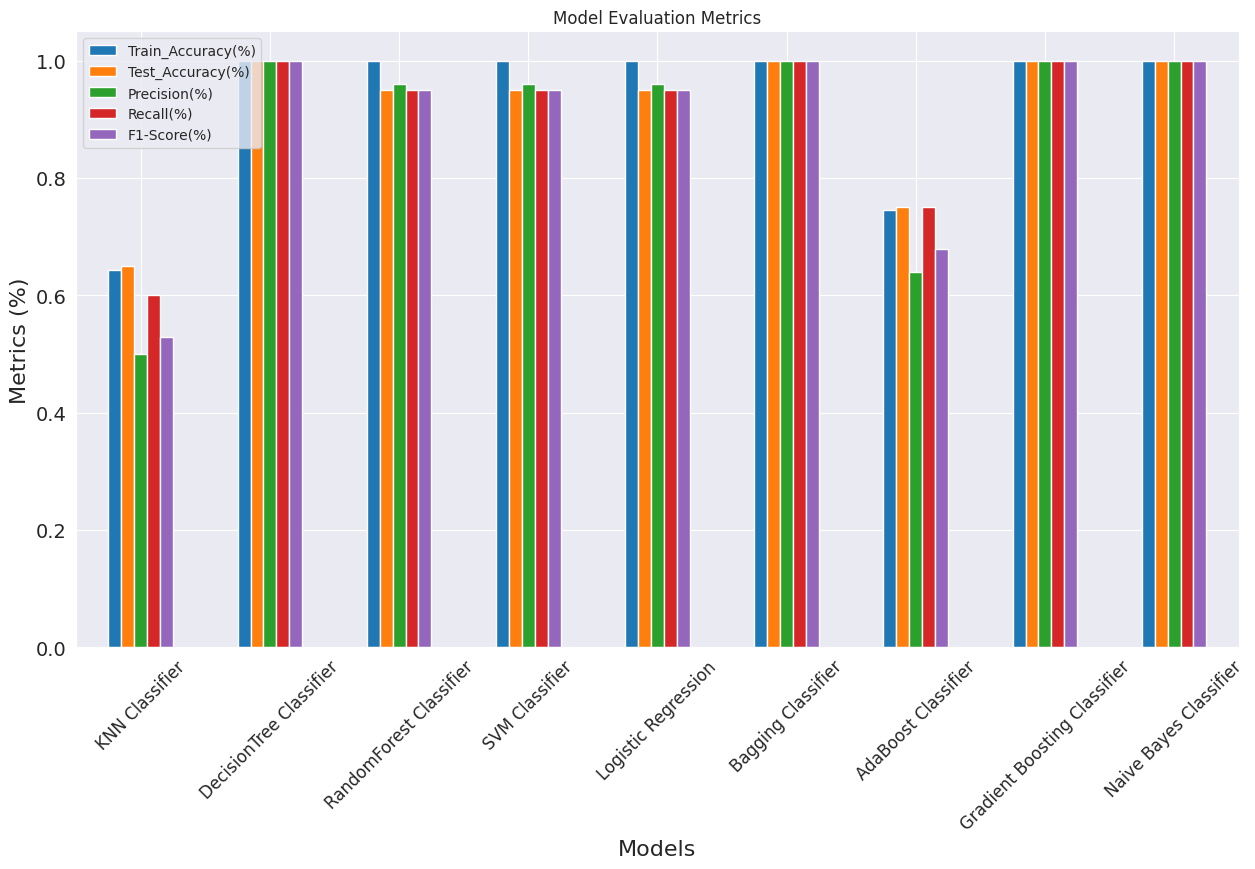

In [144]:
table = pd.DataFrame(Evaluation)
fig, ax = plt.subplots(figsize=(15, 8))
table.plot(kind='bar', ax=ax)
plt.title('Model Evaluation Metrics')
plt.xlabel('Models')
plt.ylabel('Metrics (%)')
plt.xticks(ticks=range(len(table['Models'])), labels=table['Models'], rotation=45)
plt.show()

In [145]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

Train and Test Accuracy Plot

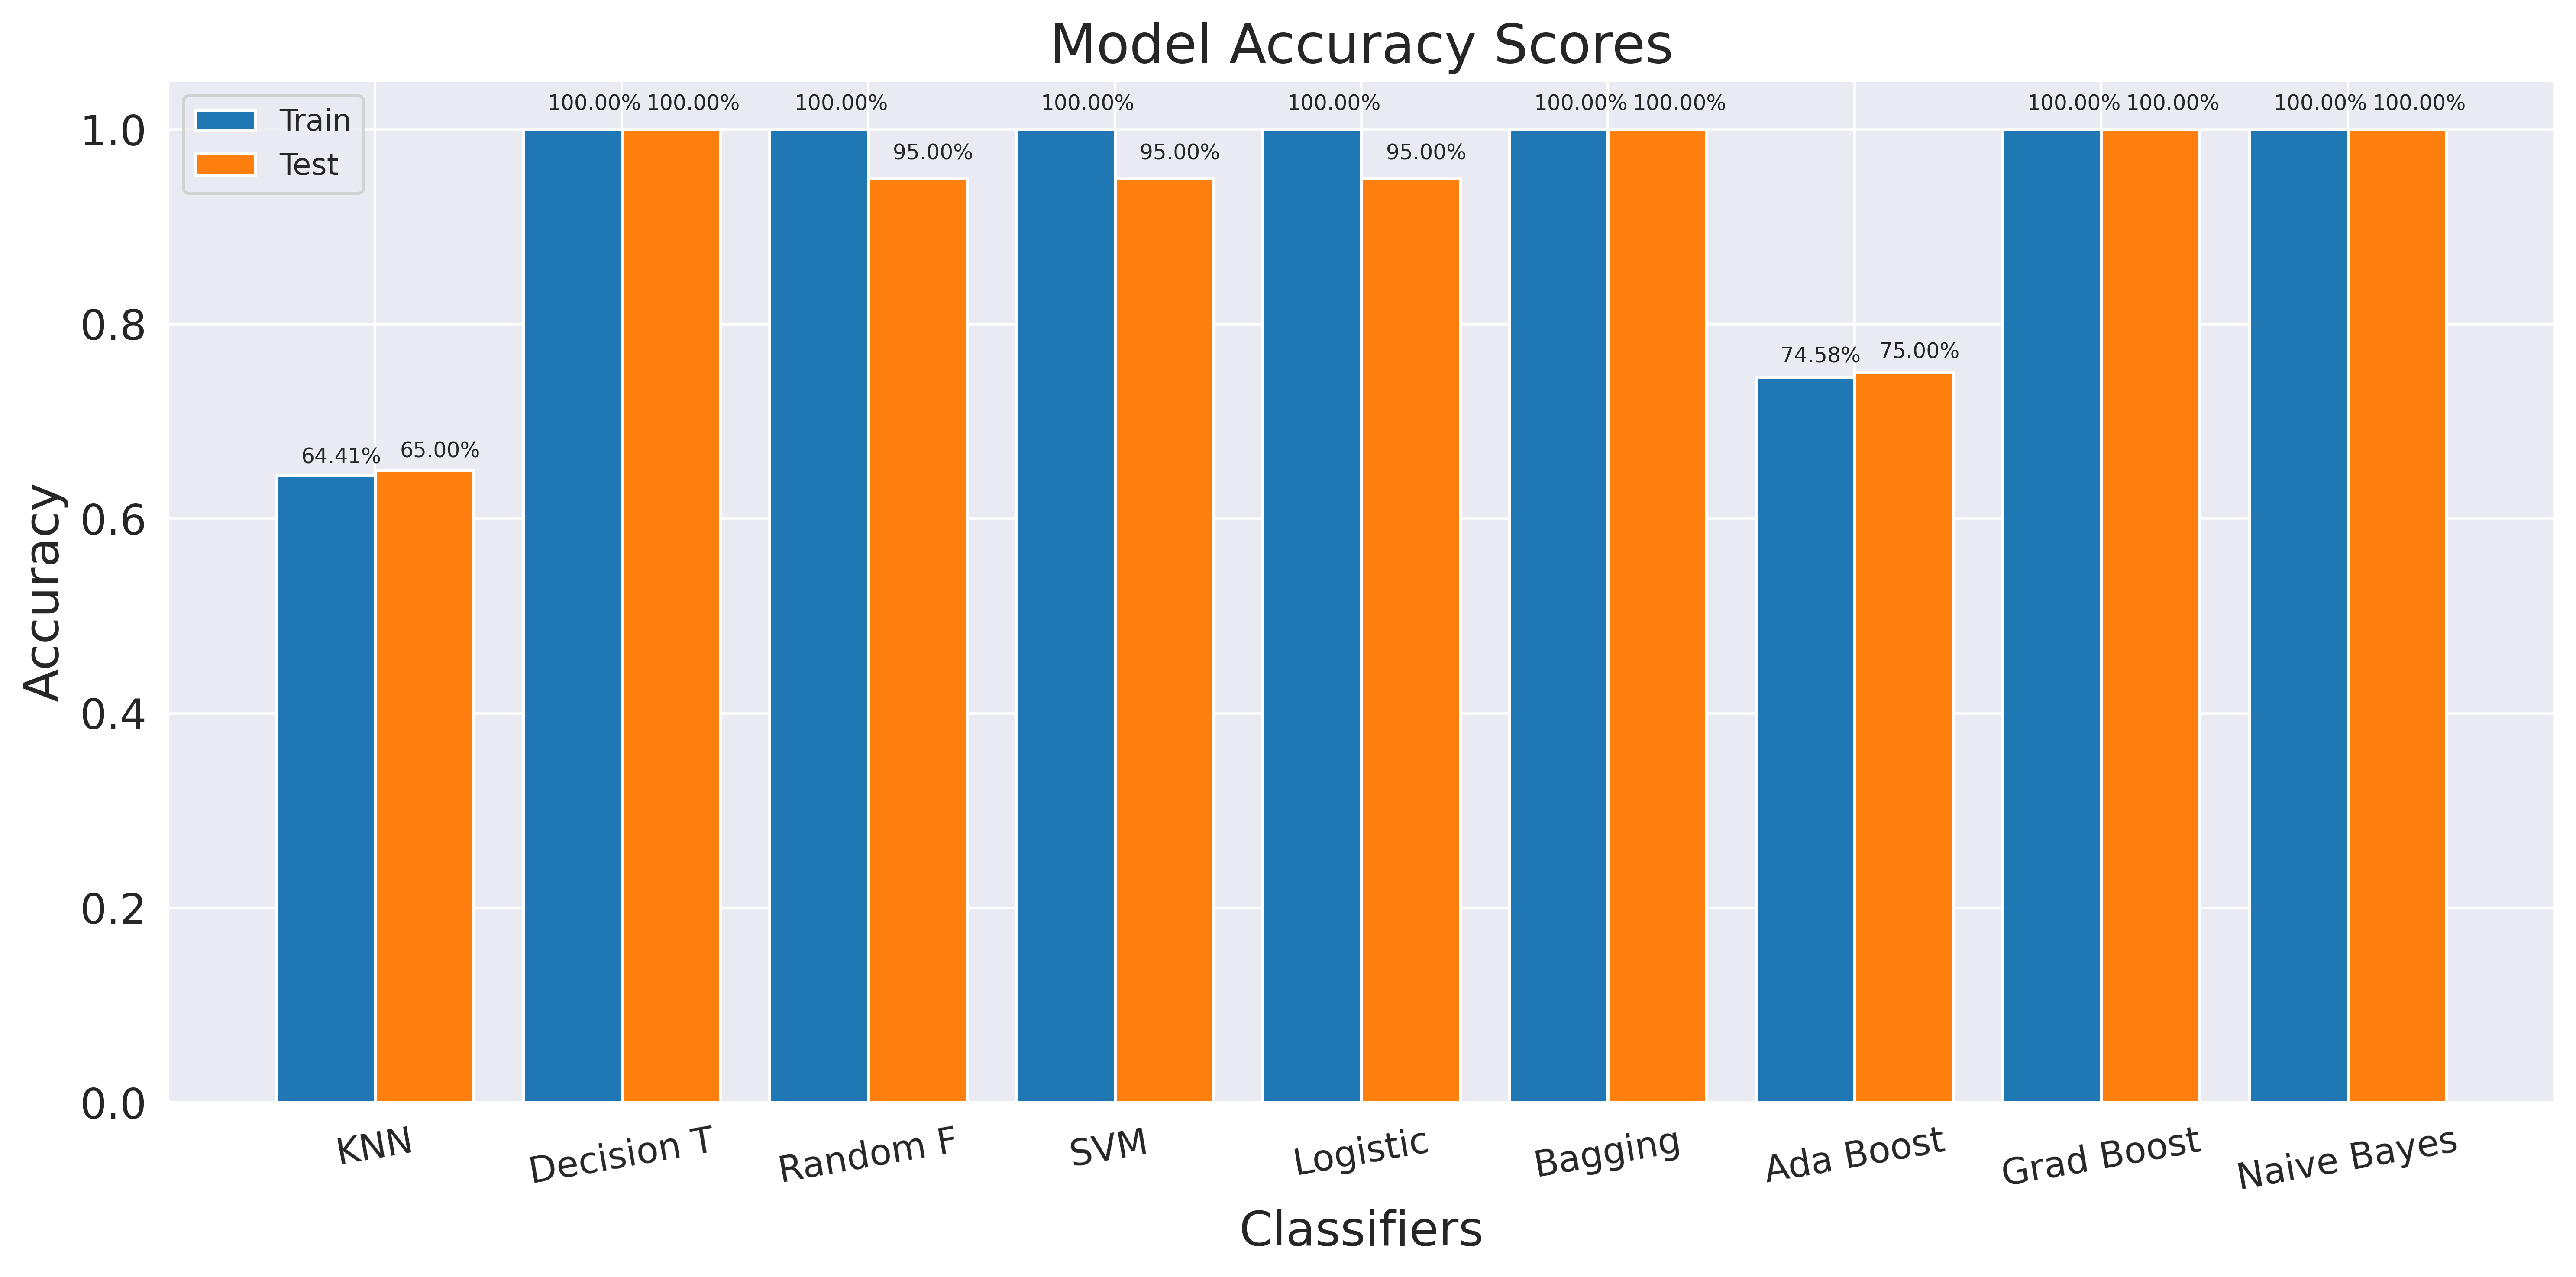

In [146]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train')
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test')
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Model Accuracy Scores", fontsize = 18)
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

##THE END